In [1]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd


In [2]:
# Load the stock market as a dictionary with a key and a value

# Key 1: Year
# Key 2: Month
# Key 3: Interest Rate
# Key 4: Unemployement Rate
# Key 5: Stock Index Price (The Output)
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

# We can work with Dictionaries and arrays; but, Pandas are cooler. 
stock_data = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

stock_data

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [3]:
# Uncomment to learn more about pd.read_csv
#?pd.read_csv

In [4]:
# Shape of our dataset
stock_data.shape

# Info our dataset
stock_data.info()

# Describe our dataset
stock_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Year                 24 non-null int64
Month                24 non-null int64
Interest_Rate        24 non-null float64
Unemployment_Rate    24 non-null float64
Stock_Index_Price    24 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.0 KB


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


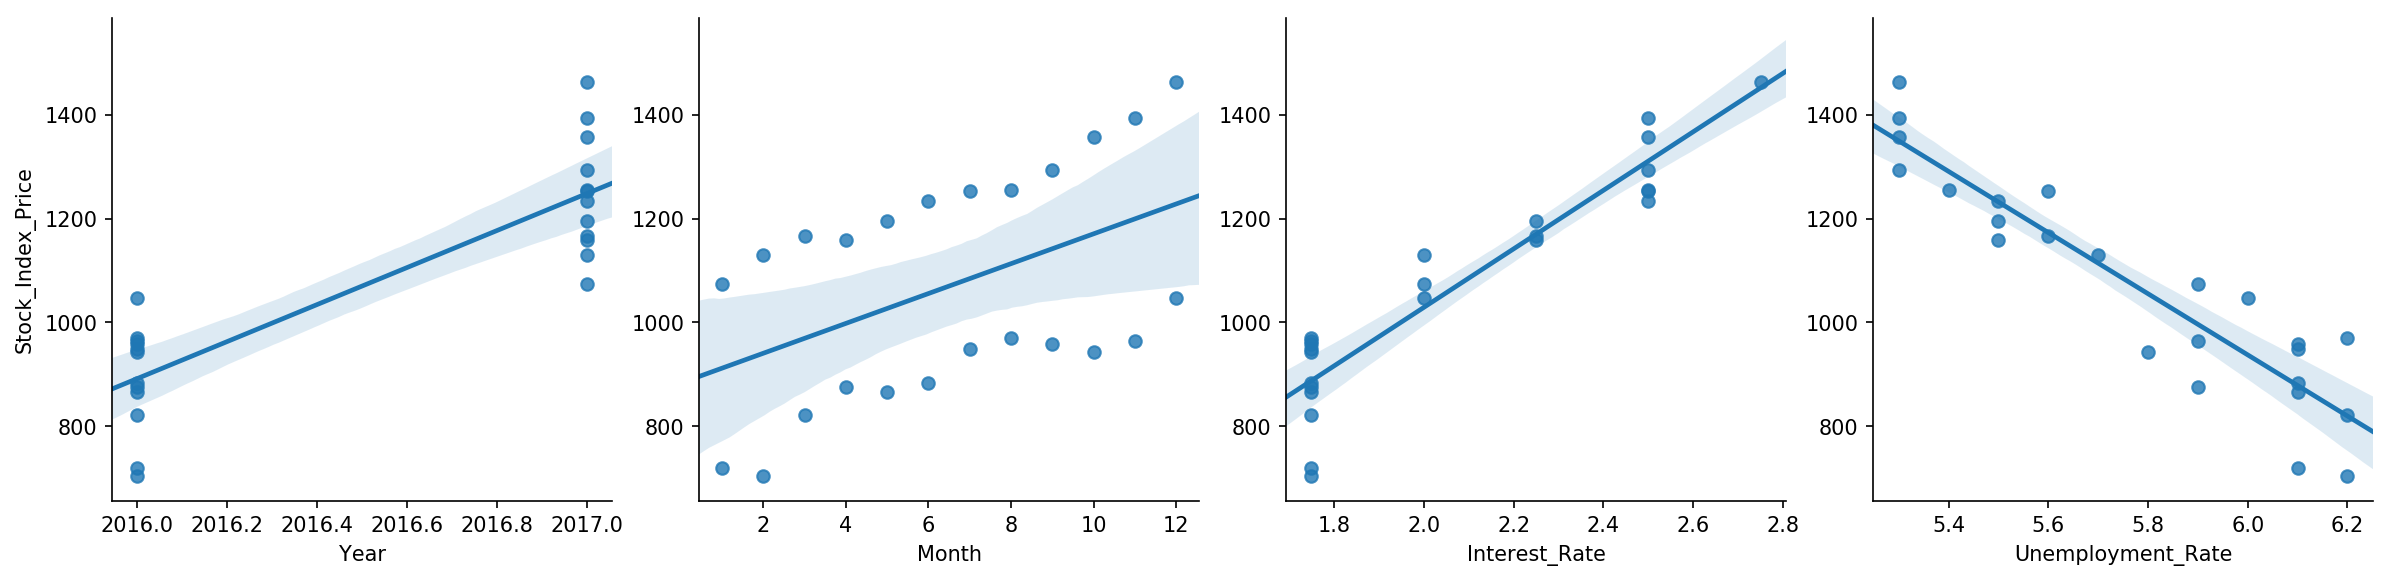

In [5]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Change dpi
plt.rcParams['figure.dpi'] = 150
#plt.rcParams['figure.figsize'] = [8.0, 8.0]

# Using pairplot we'll visualize the data for correlation
sns.pairplot(stock_data, x_vars=['Year', 'Month','Interest_Rate', 'Unemployment_Rate'], 
             y_vars='Stock_Index_Price', size=4, aspect=1, kind='reg')
#sns.pairplot(advertising, size=4, aspect=1, kind='scatter')
plt.show()

In [6]:
?sns.pairplot

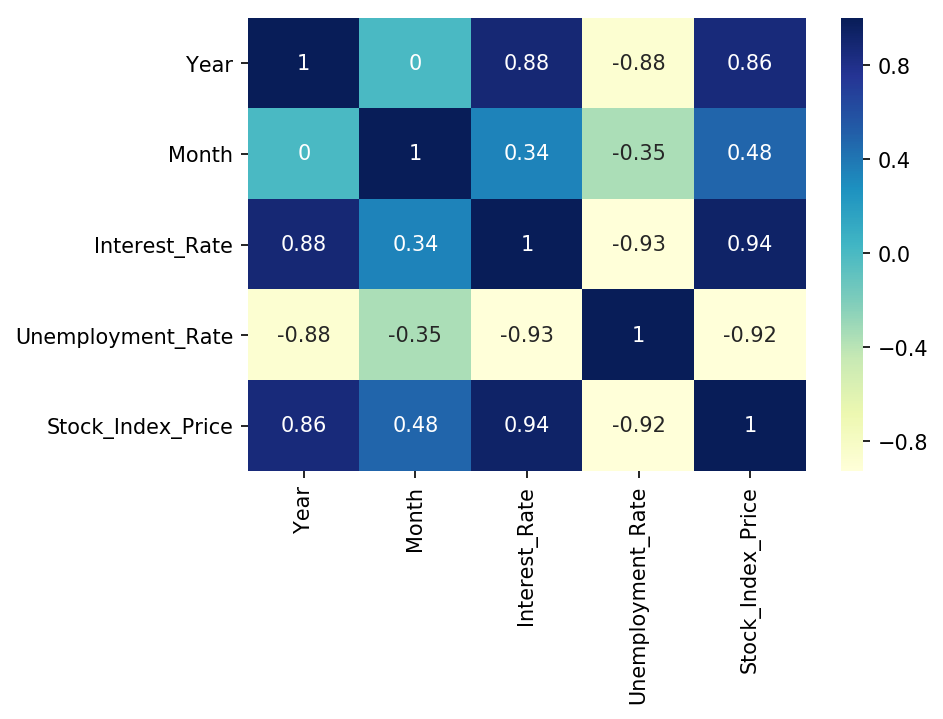

In [7]:

# Visualizing the data using heatmap
sns.heatmap(stock_data.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [8]:
#Forward_selection is only Interest RAte + constant
#Backward_selection was Year, Month, Unemployement + constant
# Creating X and y
X = stock_data[['Year','Month','Interest_Rate','Unemployment_Rate']]
y = stock_data['Stock_Index_Price']

In [9]:
# Splitting the varaibles as training and testing
# 140 samples for constructing beta_0 and beta_1
# 60 samples as an additional evaluation performance measure (with R^2 and R^2_adj)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=1)

In [10]:
#?train_test_split

In [11]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [12]:
X_train_sm

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

# Printing the parameters
lr.params



const               -715566.343456
Year                    355.198395
Month                    31.728428
Interest_Rate            27.844549
Unemployment_Rate        20.383798
dtype: float64

In [13]:
beta_0 = lr.params[0]
beta_1 = lr.params[1]
beta_2 = lr.params[2]
beta_3 = lr.params[3]
beta_4 = lr.params[4]

y_pred = beta_0*1 + beta_1*X_train['Year'] + beta_2*X_train['Month'] + beta_3*X_train['Interest_Rate'] + beta_4*X_train['Unemployment_Rate']

df = pd.DataFrame()

df['y'] = y_train
df['beta_0'] = beta_0
df['beta_1'] = beta_1
df['beta_2'] = beta_2
df['beta_3'] = beta_3
df['beta_4'] = beta_4
df['y_hat'] = y_pred
df['y_pred'] = lr.predict(X_train_sm)
df['res'] = y_train-y_pred
df['res_squared'] = (y_train-y_pred)**2 
n_train = len(X_train)
df['MSE'] = np.sum((y_train-y_pred)**2)/(n_train-5)
df['Sigma'] = np.sqrt(df['MSE'])
df

,y,beta_0,beta_1,beta_2,beta_3,beta_4,y_hat,y_pred,res,res_squared,MSE,Sigma
2,1357,-715566.343456,355.198395,31.728428,27.844549,20.383798,1363.748331,1363.748331,-6.748331,45.539978,740.055796,27.203967
19,866,-715566.343456,355.198395,31.728428,27.844549,20.383798,845.331423,845.331423,20.668577,427.190064,740.055796,27.203967
6,1234,-715566.343456,355.198395,31.728428,27.844549,20.383798,1240.911379,1240.911379,-6.911379,47.767155,740.055796,27.203967
7,1195,-715566.343456,355.198395,31.728428,27.844549,20.383798,1202.221813,1202.221813,-7.221813,52.154590,740.055796,27.203967
21,822,-715566.343456,355.198395,31.728428,27.844549,20.383798,783.912947,783.912947,38.087053,1450.623617,740.055796,27.203967
1,1394,-715566.343456,355.198395,31.728428,27.844549,20.383798,1395.476760,1395.476760,-1.476760,2.180819,740.055796,27.203967
16,971,-715566.343456,355.198395,31.728428,27.844549,20.383798,942.555087,942.555087,28.444913,809.113057,740.055796,27.203967
0,1464,-715566.343456,355.198395,31.728428,27.844549,20.383798,1434.166325,1434.166325,29.833675,890.048177,740.055796,27.203967
15,958,-715566.343456,355.198395,31.728428,27.844549,20.383798,972.245136,972.245136,-14.245136,202.923889,740.055796,27.203967
23,719,-715566.343456,355.198395,31.728428,27.844549,20.383798,718.417711,718.417711,0.582289,0.339061,740.055796,27.203967


In [14]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.40e-11
Time:                        12:39:34   Log-Likelihood:                -72.559
No. Observations:                  16   AIC:                             155.1
Df Residuals:                      11   BIC:                             159.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.156e+05   9.71e+04     -7.371      0.000   -9.29e+05   -5.02e+05
Year                355.1984     48.037      7.394      0.000     249.469     460.928
Month                31.7284      3.146     10.084      0.000      24.803      38.654
Interest_Rate        27.8445     77.437      0.360      0.726    -142.593     198.282
Unemployment_Rate    20.3838     81.974      0.249      0.808    -160.041     200.808
==============================================================================
Omnibus:                        0.015   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.192
Skew:                          -0.059   Prob(JB):                        0.908
Kurtosis:                       2.476   Cond. No.                     2.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

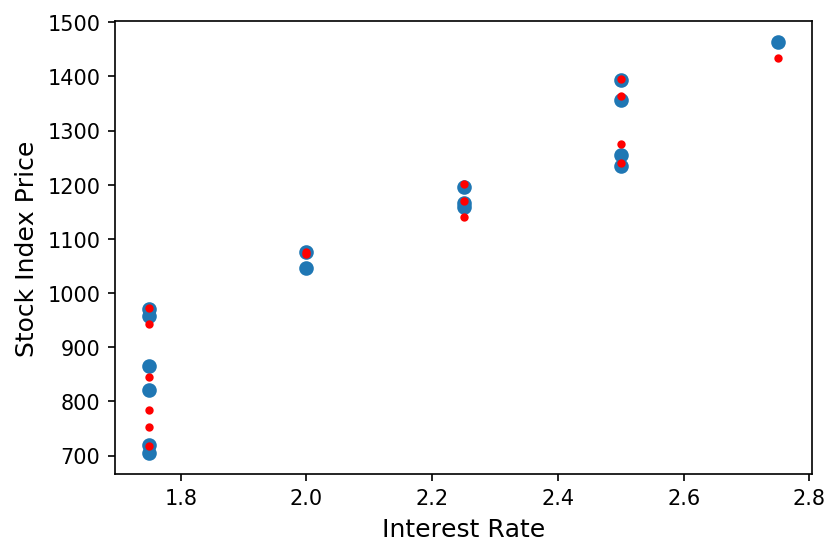

In [15]:
# Visualizing the regression line
plt.scatter(X_train['Interest_Rate'], y_train)
plt.plot(X_train['Interest_Rate'], y_pred, 'r.')
plt.ylabel('Stock Index Price', fontsize=12)
plt.xlabel('Interest Rate', fontsize=12)
plt.show()

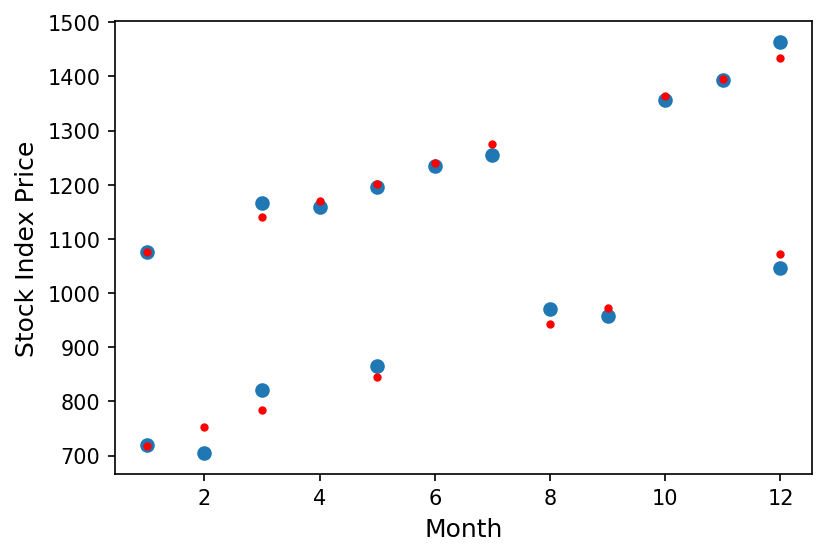

In [16]:
# Visualizing the regression line
plt.scatter(X_train['Month'], y_train)
plt.plot(X_train['Month'], y_pred, 'r.')
plt.ylabel('Stock Index Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

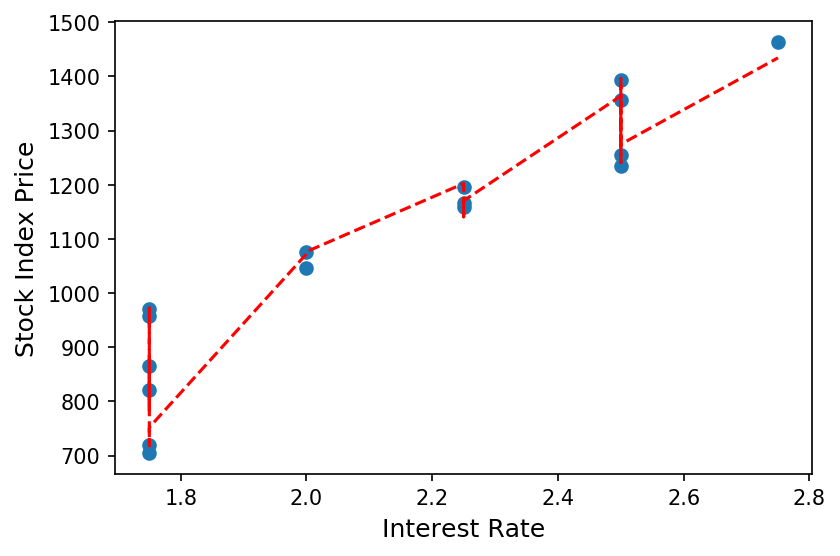

In [17]:
# Sorting and replotting
# Plots can only have x-axis and y-axis
# Sort based on the x-axis and then plot

idx = np.argsort(X_train['Interest_Rate']).values
X_tr_sorted = X_train['Interest_Rate'].values[idx]
Y_tr_sorted = y_train.values[idx]
Y_pred_sorted = y_pred.values[idx]

# Plotting again
plt.scatter(X_tr_sorted, Y_tr_sorted)
plt.plot(X_tr_sorted, Y_pred_sorted, 'r--')
plt.ylabel('Stock Index Price', fontsize=12)
plt.xlabel('Interest Rate', fontsize=12)
plt.show()

In [18]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Visualizing the confidence interval
from scipy import stats
n = len(res)
SSE = np.sum(res**2)
MSE = SSE/(n-5)
y_pred = y_train_pred

# Misc values
t_fac = stats.t.ppf(1-0.025, 15)
X_train_sm_np = X_train_sm.values
VAR_beta = np.linalg.inv(np.matmul(X_train_sm_np.T,X_train_sm_np))*MSE

Var_mu = np.diag(np.matmul(np.matmul(X_train_sm_np,VAR_beta),X_train_sm_np.T))

c_low_train = y_train_pred - t_fac*np.sqrt(Var_mu)
c_up_train = y_train_pred + t_fac*np.sqrt(Var_mu)

p_low_train = y_train_pred - t_fac*np.sqrt(MSE+Var_mu)
p_up_train = y_train_pred + t_fac*np.sqrt(MSE+Var_mu)

#plt.scatter(X_train, y_train)
#plt.plot(X_train, y_train_pred, 'g')
#plt.plot(X_train, c_low_train, 'r-.')
#plt.plot(X_train, p_low_train, 'k-.')
#plt.ylabel('Sales (Training)', fontsize=12)
#plt.xlabel('TV Advertisements (Training)', fontsize=12)
#plt.legend(['Regression Line','95% CI', '95% PI','Observed'],fontsize=12)
#plt.plot(X_train, c_up_train, 'r-.')
#plt.plot(X_train, p_up_train, 'k-.')
#plt.show()

In [19]:
np.diag(np.sqrt(VAR_beta))

array([  9.70816412e+04,   4.80373608e+01,   3.14649202e+00,
         7.74369520e+01,   8.19744654e+01])

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.40e-11
Time:                        12:39:35   Log-Likelihood:                -72.559
No. Observations:                  16   AIC:                             155.1
Df Residuals:                      11   BIC:                             159.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.156e+05   9.71e+04     -7.371      0.000   -9.29e+05   -5.02e+05
Year                355.1984     48.037      7.394      0.000     249.469     460.928
Month                31.7284      3.146     10.084      0.000      24.803      38.654
Interest_Rate        27.8445     77.437      0.360      0.726    -142.593     198.282
Unemployment_Rate    20.3838     81.974      0.249      0.808    -160.041     200.808
==============================================================================
Omnibus:                        0.015   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.192
Skew:                          -0.059   Prob(JB):                        0.908
Kurtosis:                       2.476   Cond. No.                     2.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
PI_CI_df = pd.DataFrame()
PI_CI_df['Stock_Price_y'] = y_train
PI_CI_df['beta_0'] = lr.params[0]
PI_CI_df['beta_1'] = lr.params[1]
PI_CI_df['beta_2'] = lr.params[2]
PI_CI_df['beta_3'] = lr.params[3]
PI_CI_df['beta_4'] = lr.params[4]
PI_CI_df['Sales_pred'] = y_pred
PI_CI_df['Y_bar_var'] = Var_mu
PI_CI_df['t_multiplier'] = stats.t.ppf(1-0.025, 138)
PI_CI_df['MSE'] = MSE
PI_CI_df['Lower_CI_tail'] = c_low_train
PI_CI_df['Upper_CI_tail'] = c_up_train
PI_CI_df['Lower_PI_tail'] = p_low_train
PI_CI_df['Upper_PI_tail'] = p_up_train
PI_CI_df

,Stock_Price_y,beta_0,beta_1,beta_2,beta_3,beta_4,Sales_pred,Y_bar_var,t_multiplier,MSE,Lower_CI_tail,Upper_CI_tail,Lower_PI_tail,Upper_PI_tail
2,1357,-715566.343456,355.198395,31.728428,27.844549,20.383798,1363.748331,198.334586,1.977304,740.055796,1333.730848,1393.765815,1298.455300,1429.041363
19,866,-715566.343456,355.198395,31.728428,27.844549,20.383798,845.331423,127.904155,1.977304,740.055796,821.225854,869.436992,782.536447,908.126399
6,1234,-715566.343456,355.198395,31.728428,27.844549,20.383798,1240.911379,173.737562,1.977304,740.055796,1212.816839,1269.005918,1176.479758,1305.342999
7,1195,-715566.343456,355.198395,31.728428,27.844549,20.383798,1202.221813,171.377964,1.977304,740.055796,1174.318708,1230.124919,1137.873434,1266.570193
21,822,-715566.343456,355.198395,31.728428,27.844549,20.383798,783.912947,150.895112,1.977304,740.055796,757.730355,810.095539,720.291734,847.534160
1,1394,-715566.343456,355.198395,31.728428,27.844549,20.383798,1395.476760,219.455465,1.977304,740.055796,1363.901403,1427.052116,1329.453024,1461.500495
16,971,-715566.343456,355.198395,31.728428,27.844549,20.383798,942.555087,226.798271,1.977304,740.055796,910.455834,974.654340,876.279205,1008.830970
0,1464,-715566.343456,355.198395,31.728428,27.844549,20.383798,1434.166325,317.486044,1.977304,740.055796,1396.187862,1472.144787,1364.851866,1503.480784
15,958,-715566.343456,355.198395,31.728428,27.844549,20.383798,972.245136,245.389044,1.977304,740.055796,938.856195,1005.634076,905.335107,1039.155164
23,719,-715566.343456,355.198395,31.728428,27.844549,20.383798,718.417711,327.232451,1.977304,740.055796,679.860711,756.974711,648.784580,788.050841


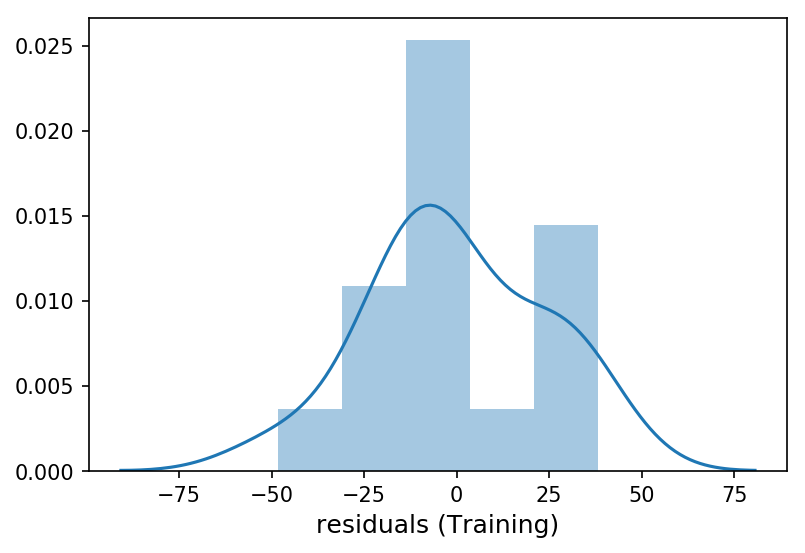

In [22]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 5, kde=True)
#plt.title('Error Terms', fontsize = 15)
plt.xlabel('residuals (Training)', fontsize = 12)
plt.show()

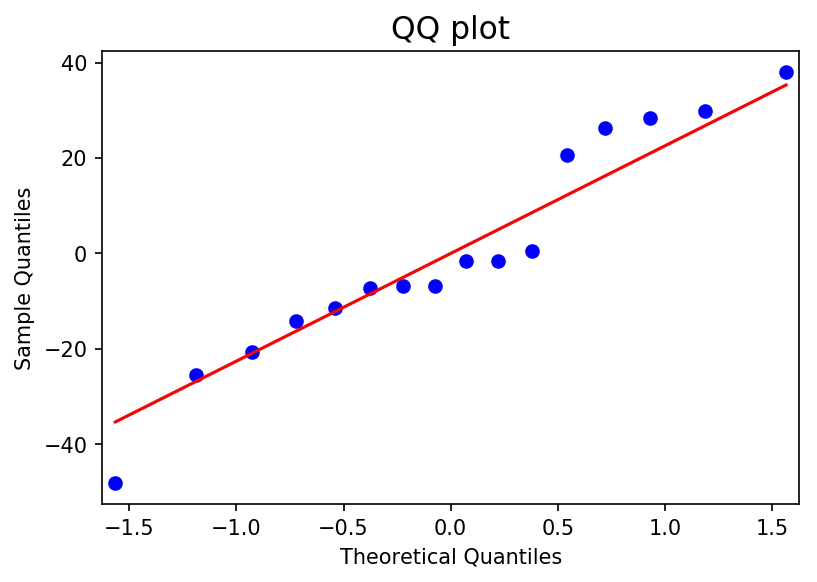

In [23]:
# QQ-plot: Looking to see if the residuals follows a normal distribution using standardized normal dist quantiles
sm.qqplot(res, line ='s')
plt.title('QQ plot', fontsize=15)
plt.show()

In [24]:
#?sm.qqplot

In [25]:
#?sns.distplot

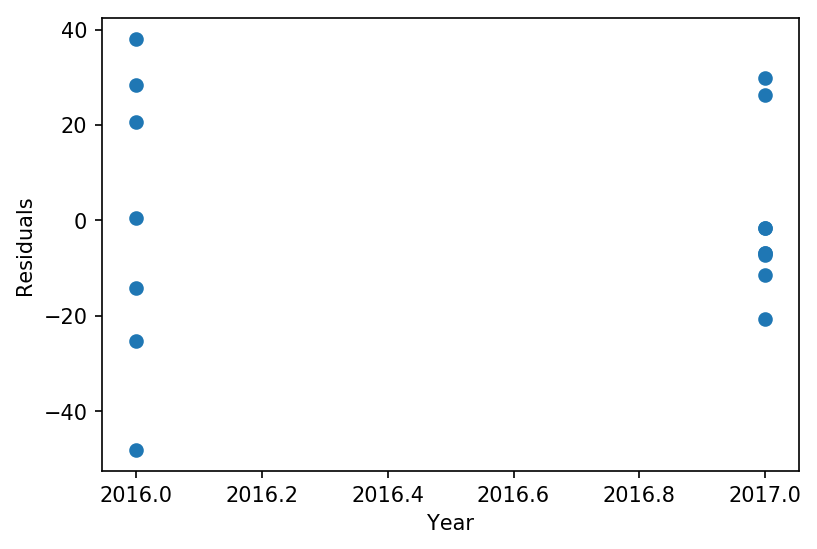

In [26]:
# Looking for any patterns in the residuals
plt.scatter(X_train['Year'],res)
plt.ylabel('Residuals')
plt.xlabel('Year')
plt.show()

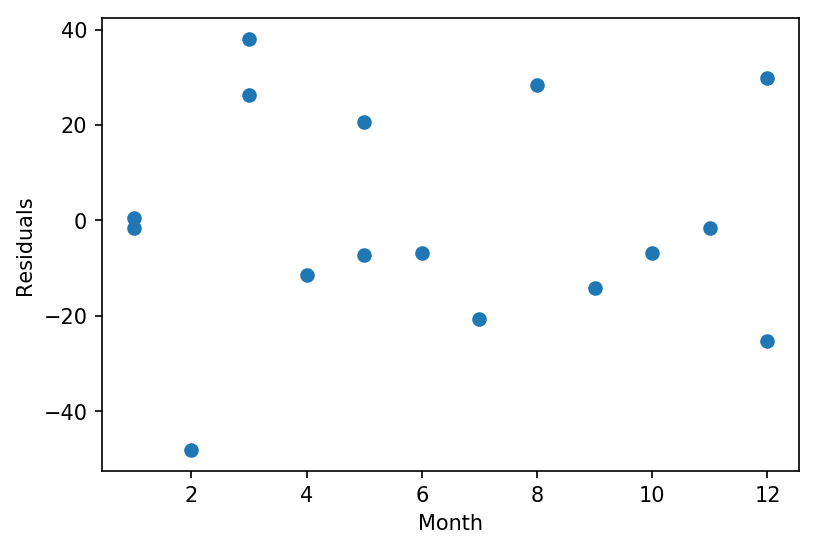

In [27]:
# Looking for any patterns in the residuals
plt.scatter(X_train['Month'],res)
plt.ylabel('Residuals')
plt.xlabel('Month')
plt.show()

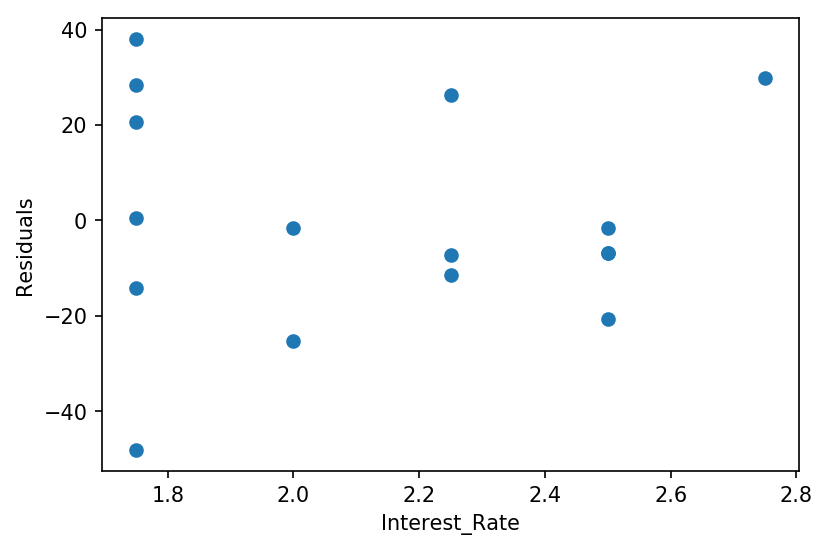

In [28]:
# Looking for any patterns in the residuals
plt.scatter(X_train['Interest_Rate'],res)
plt.ylabel('Residuals')
plt.xlabel('Interest_Rate')
plt.show()

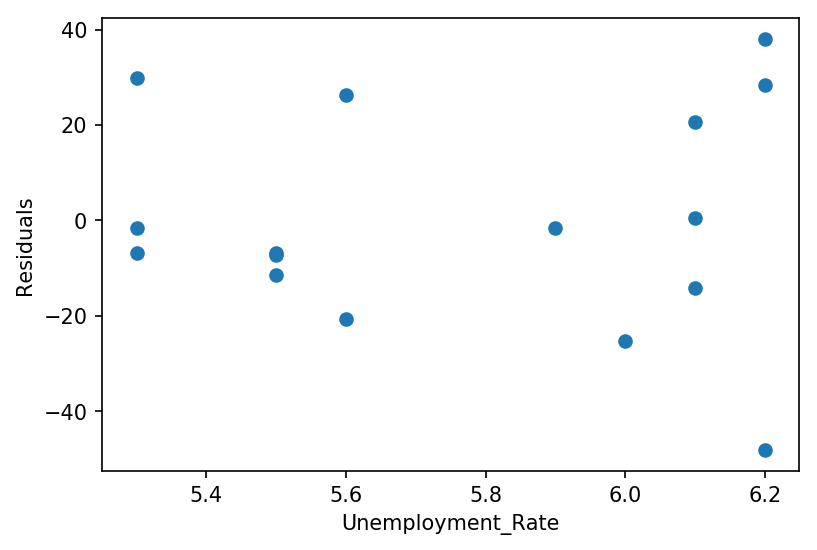

In [29]:
# Looking for any patterns in the residuals
plt.scatter(X_train['Unemployment_Rate'],res)
plt.ylabel('Residuals')
plt.xlabel('Unemployment_Rate')
plt.show()

In [30]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

13    1031.625232
18     877.059851
3     1332.019903
14     997.858424
20     809.526236
17     908.788279
10    1104.152152
4     1302.329855
dtype: float64

In [31]:
?lr.predict

In [32]:
# Importing r2_square
from sklearn.metrics import r2_score

res_test = y_test-y_test_pred
SST = np.sum((y_test - np.mean(y_test))**2)
SSE = np.sum(res_test**2)
r_squared_manual = 1-SSE/SST
print(r_squared_manual)
n_test = len(y_test)
MSE = SSE/(n_test-5)
MST = SST/(n_test-1)
r_squared_adjusted = 1-MSE/MST
print(r_squared_adjusted)
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.907527440586
0.7842306947


0.90752744058556778

In [40]:
max(lr.pvalues.values[-2:])

0.80820498826295095

In [39]:
lr.pvalues

const                1.410830e-05
Year                 1.369813e-05
Month                6.801431e-07
Interest_Rate        7.259713e-01
Unemployment_Rate    8.082050e-01
dtype: float64

In [45]:
lr.pvalues.values[1:]

array([  1.36981268e-05,   6.80143130e-07,   7.25971316e-01,
         8.08204988e-01])